# 미니 프로젝트: 장애인 콜택시 대기시간 예측 모델 개발
> 일기 예보에 따라 장애인 콜택시 대기 시간을 예측하는 모델을 개발하여 장애인 이동권 개선

<img src = "https://www.sisul.or.kr/open_content/calltaxi/images/visual_img.jpg"/>

## 단계 2. 데이터 분석

In [1]:
# 라이브러리 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import scipy.stats as spst

In [2]:
df = joblib.load('Dataset/preprocess_data.pkl')

### (1) 단변량 분석

#### 범주형 변수

In [3]:
# 범주형 변수 분석
def eda_1_c(data, var, hue_var = ''):

    # 범주 값 (개수, 비율)
    cnt = data[var].value_counts()
    prop = data[var].value_counts() / data.shape[0]
    result = pd.DataFrame({'Count':cnt, 'Prop':prop})
    display(result)

    # 막대 그래프
    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

##### 공휴일 수

,Count,Prop
holiday,,
No,2803,0.958946
Yes,120,0.041054


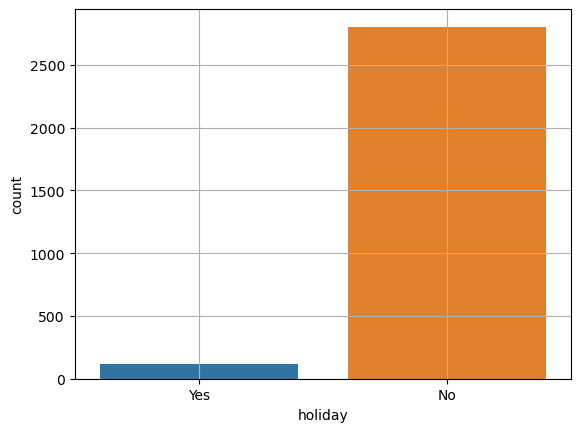

In [4]:
eda_1_c(df, 'holiday')

#### 수치형 변수

In [5]:
# 숫자형 변수 분석
def eda_1_n(data, var, hue_var = ''):
    display(data[[var]].describe().T)

    if hue_var == '' :
        
        plt.figure(figsize = (15,10))
        
        # Histogram, KDE
        plt.subplot(2,1,1)
        sns.histplot(data[var], kde = True, bins = 50)
        plt.grid()
        
        # 박스 Plot
        plt.subplot(2,1,2)
        sns.boxplot(x = data[var])
        plt.grid()
        plt.show()
        
    else :
        plt.figure(figsize = (15,5))
        
        # KDE
        plt.subplot(1,2,1)
        sns.kdeplot(x = var, data = data, hue = hue_var)
        plt.grid()
        
        # 박스 Plot
        plt.subplot(1,2,2)
        sns.boxplot(x = hue_var, y = var, data = data)
        plt.grid()

##### 접수건

,count,mean,std,min,25%,50%,75%,max
reg_cnt,2923.0,3924.83818,1510.056733,527.0,2161.0,4720.0,5110.0,6182.0


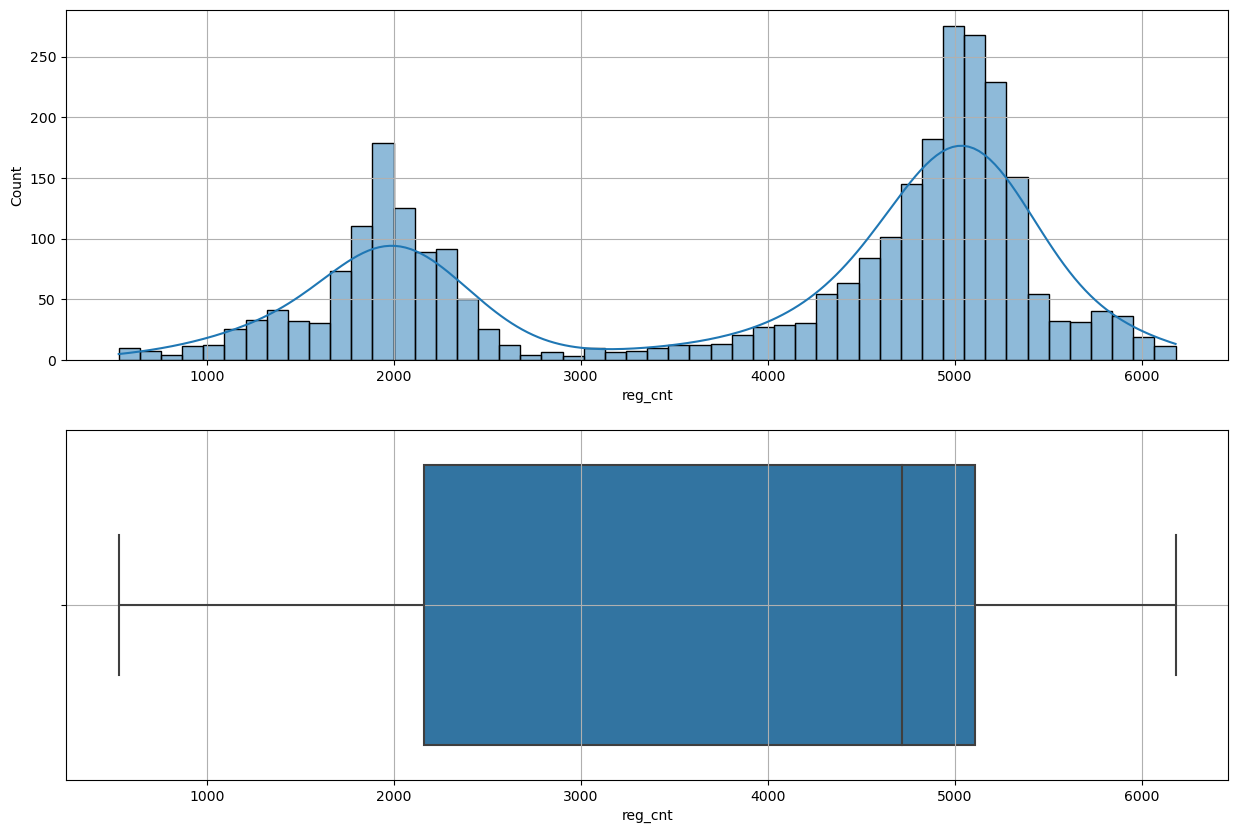

In [6]:
eda_1_n(df, 'reg_cnt')

##### 평균 대기 시간

,count,mean,std,min,25%,50%,75%,max
average_wait_time,2923.0,40.300171,14.099285,17.2,29.6,38.2,48.6,96.1


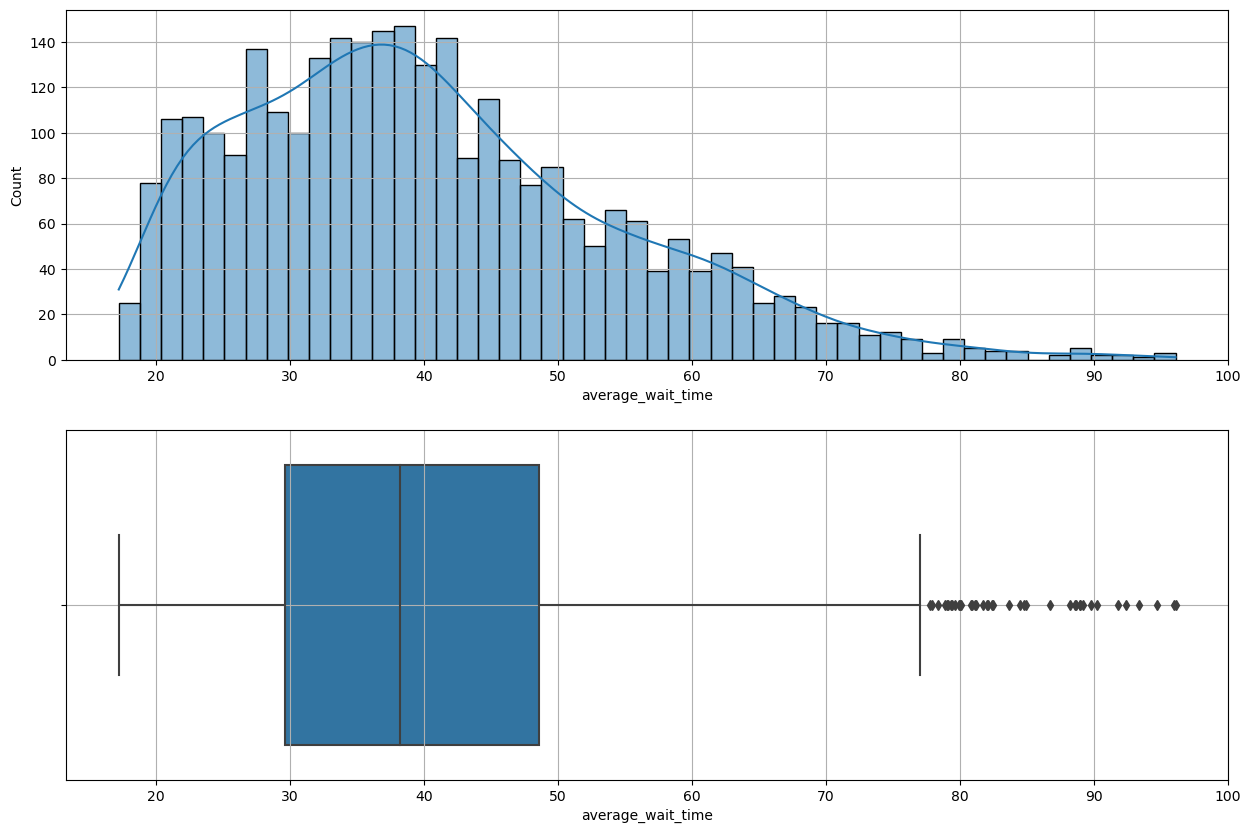

In [7]:
eda_1_n(df, 'average_wait_time')

##### 평균 요금

,count,mean,std,min,25%,50%,75%,max
average_fare,2923.0,2304.362299,107.351769,2131.0,2228.0,2257.0,2401.0,2733.0


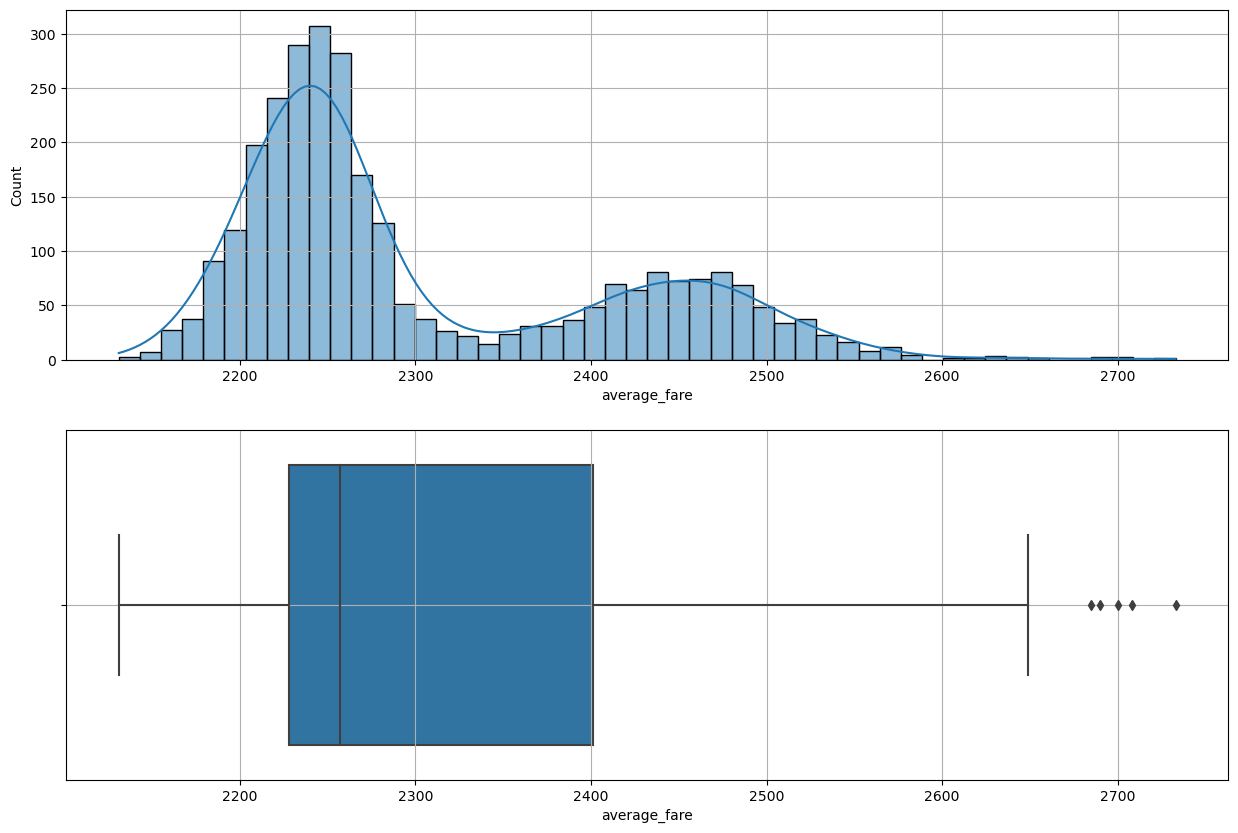

In [8]:
eda_1_n(df, 'average_fare')

##### 평균 거리

,count,mean,std,min,25%,50%,75%,max
average_dist,2923.0,9254.353062,1020.066902,7672.0,8521.0,8822.0,10154.0,14136.0


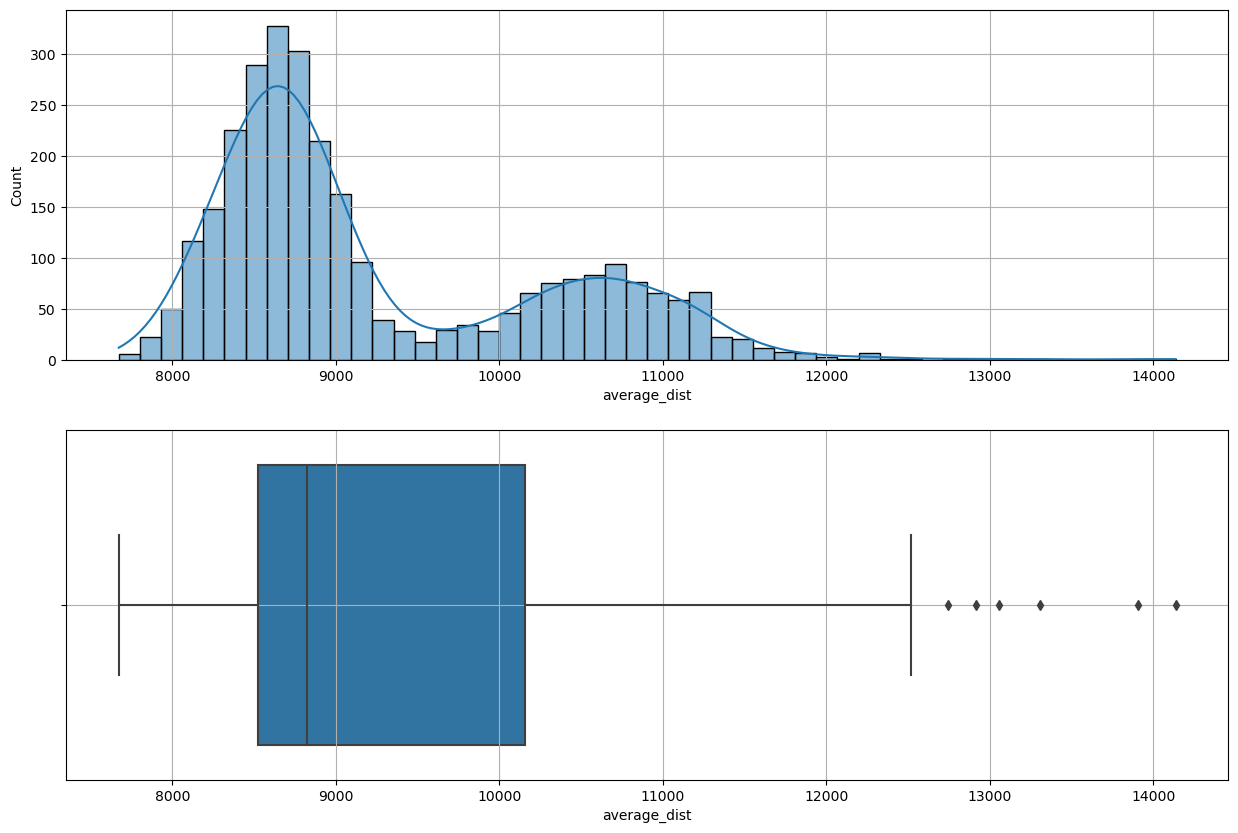

In [9]:
eda_1_n(df, 'average_dist')

##### 탑승율

,count,mean,std,min,25%,50%,75%,max
ride_ratio,2923.0,119.302386,7.726662,103.215768,113.931779,118.263267,124.074982,167.505241


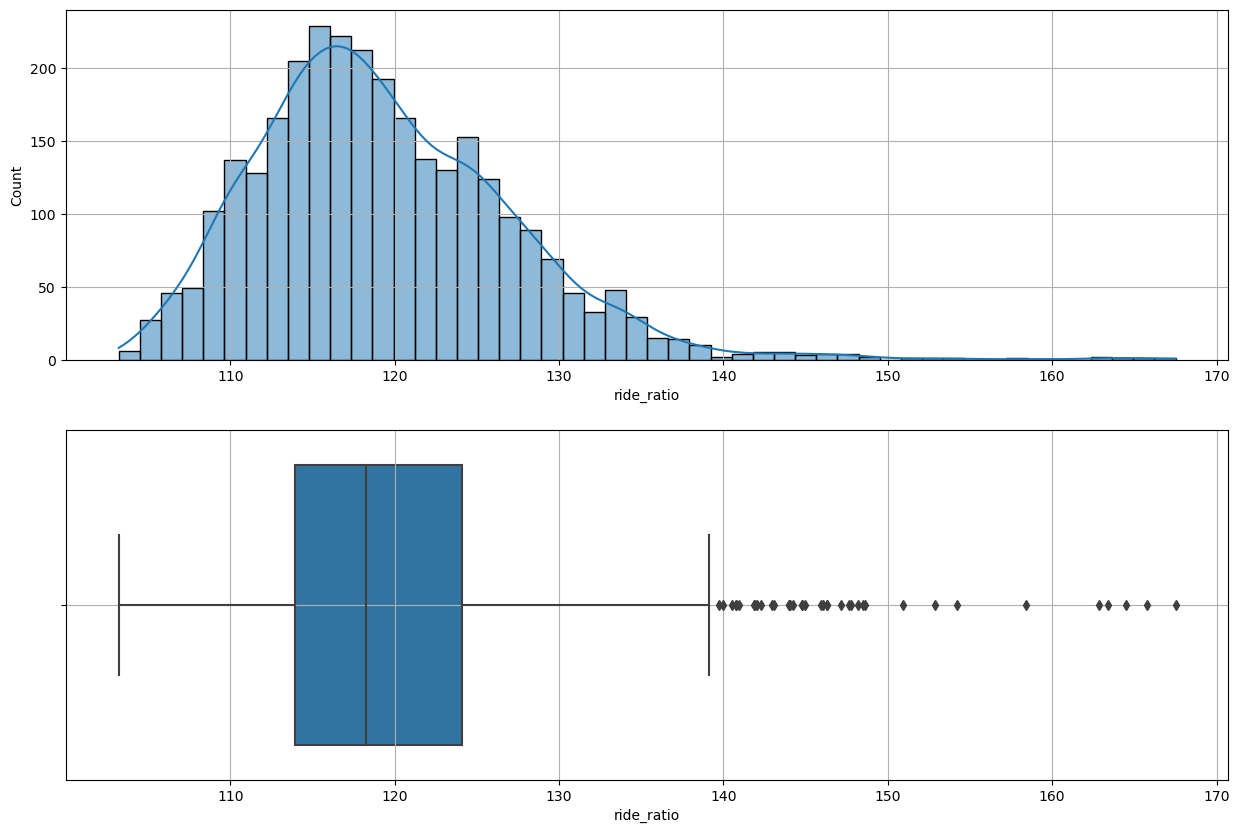

In [10]:
eda_1_n(df, 'ride_ratio')

##### 최고기온

,count,mean,std,min,25%,50%,75%,max
temp_max,2923.0,18.071502,10.71141,-11.2,9.0,19.7,27.4,39.4


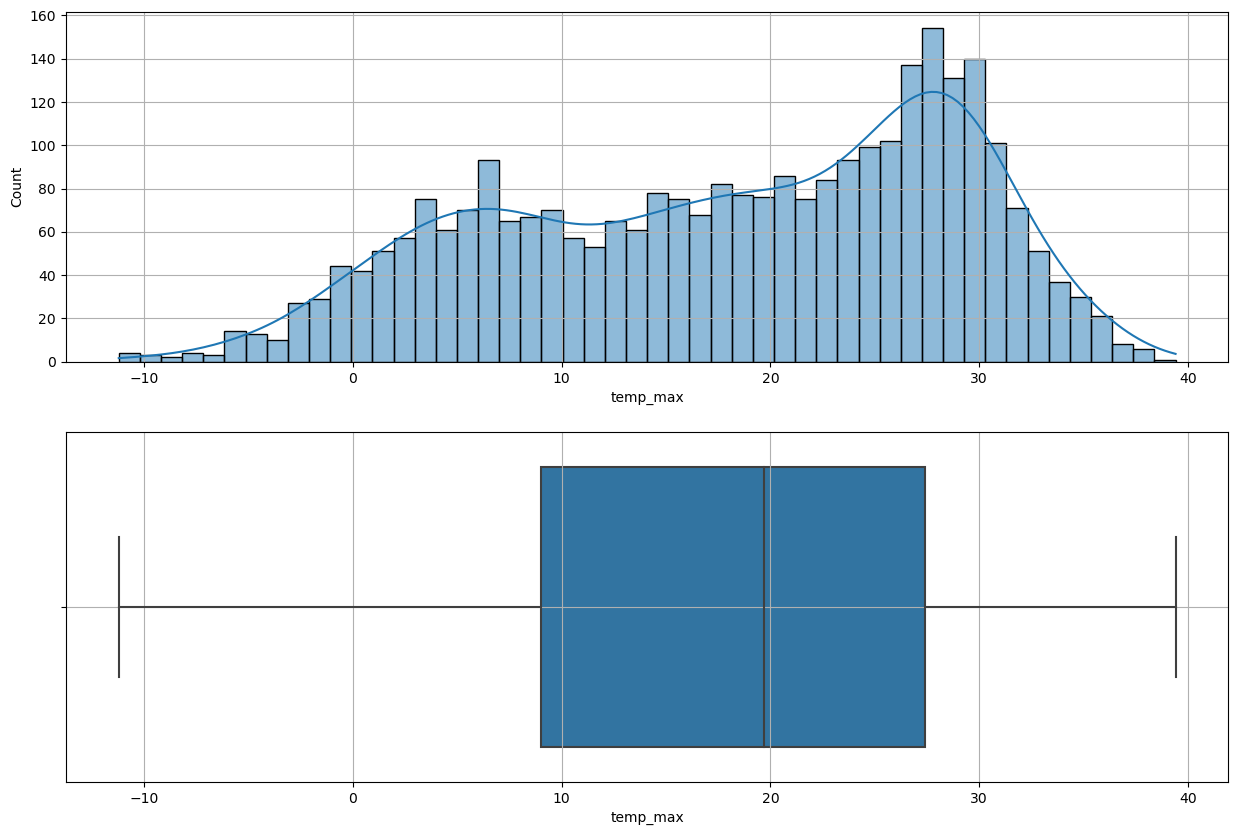

In [11]:
eda_1_n(df, 'temp_max')

##### 강수량

,count,mean,std,min,25%,50%,75%,max
rain(mm),2923.0,3.354465,12.593801,0.0,0.0,0.0,0.3,178.9


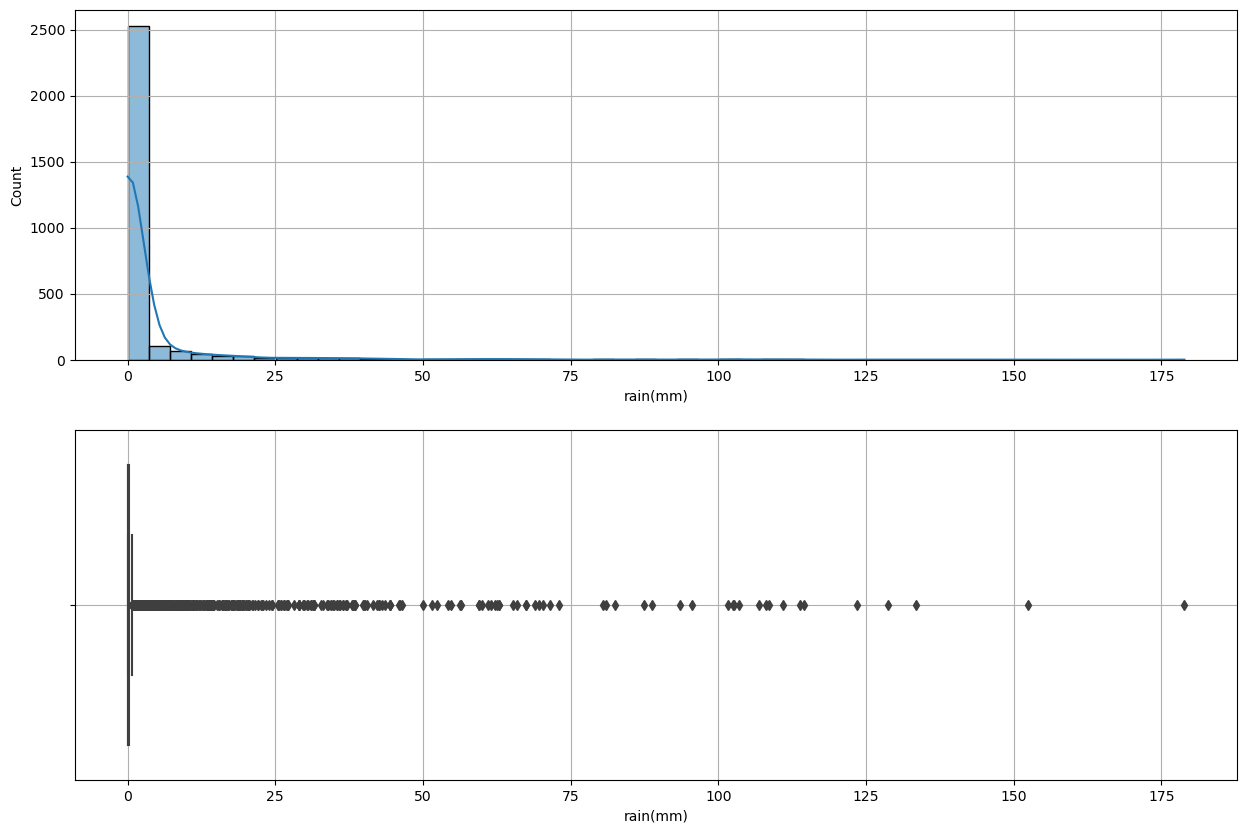

In [12]:
eda_1_n(df, 'rain(mm)')

### (2) 이변량 분석

#### 상관계수

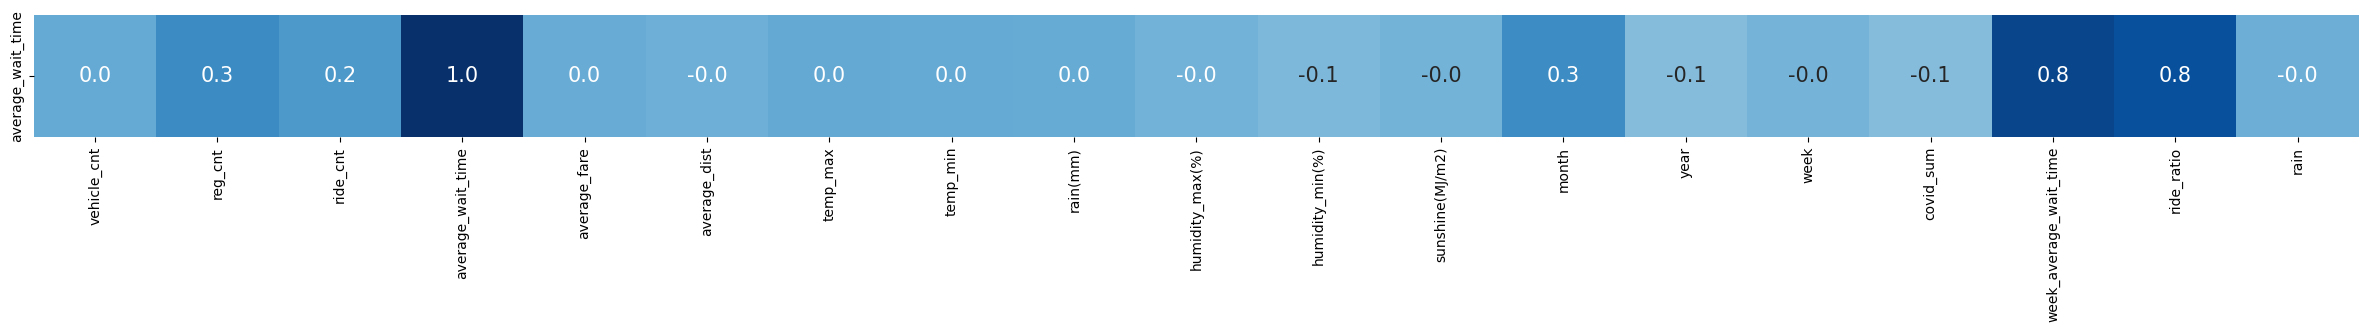

In [13]:
plt.figure(figsize = (30, 15))
sns.heatmap(df.corr(numeric_only=True)[['average_wait_time']].T, 
            annot = True,            # 숫자(상관계수) 표기 여부
            annot_kws={'size': 15},  # 주석(annot)의 스타일 조정
            fmt = '.1f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'Blues',          # 칼라맵
            cbar = False,            # 막대 그래프
            vmin = -1, vmax = 1,     # 값의 최소, 최대값
            square = True)           # 사각형 여부
plt.show()

In [14]:
# 전체 상관관계를 한눈에 보여주기 함수
def eda_2_corr(data, num_vars):

    temp = data.loc[:, num_vars]
    corr = temp.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    display(mask * corr)

    sns.set(style='white')
    plt.figure(figsize=(12, 12))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, 
                mask=mask, 
                cmap=cmap, 
                center=0, 
                square=True, 
                fmt = '.1f',
                linewidths=.5, 
                annot = True)
    plt.show()

,Date,vehicle_cnt,reg_cnt,ride_cnt,average_wait_time,average_fare,average_dist,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),month,year,covid_sum,week_average_wait_time,ride_ratio
Date,1.0,0.25765,0.012408,0.008864,-0.088682,-0.101120,-0.211494,0.013757,0.035799,0.056993,0.110841,0.195875,0.082261,0.124544,0.992155,0.356146,-0.106764,-0.026053
vehicle_cnt,0.0,1.00000,0.885944,0.904711,0.036265,-0.844599,-0.857587,0.102563,0.106414,0.028615,0.065840,0.097343,0.060028,0.131221,0.242936,0.154443,-0.068386,0.000864
reg_cnt,0.0,0.00000,1.000000,0.988760,0.292297,-0.850360,-0.847801,0.052616,0.052360,0.004648,0.007751,0.007576,0.007300,0.088752,0.000958,0.068651,0.186252,0.215838
ride_cnt,0.0,0.00000,0.000000,1.000000,0.184828,-0.867966,-0.858673,0.058552,0.055289,-0.013717,0.010256,0.010883,0.029755,0.059738,0.001081,0.089740,0.079600,0.081457
average_wait_time,-0.0,0.00000,0.000000,0.000000,1.000000,0.019276,-0.014135,0.045180,0.034205,0.028574,-0.035497,-0.092486,-0.041686,0.282139,-0.125690,-0.132662,0.840625,0.757431
average_fare,-0.0,-0.00000,-0.000000,-0.000000,0.000000,1.000000,0.977614,0.095925,0.069029,-0.051222,-0.018114,-0.064793,0.062858,0.051443,-0.108311,-0.124288,0.121580,0.016497
average_dist,-0.0,-0.00000,-0.000000,-0.000000,-0.000000,0.000000,1.000000,0.098432,0.071301,-0.057209,-0.017321,-0.068240,0.053972,0.033975,-0.217333,-0.132443,0.077627,-0.023942
temp_max,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.961639,0.116951,0.307388,0.284861,0.475115,0.213691,-0.012603,-0.042583,0.039986,-0.035518
temp_min,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.201840,0.401642,0.462098,0.308496,0.244295,0.005732,-0.041604,0.031192,-0.025561
rain(mm),0.0,0.00000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,1.000000,0.335397,0.446522,-0.285273,0.047421,0.051784,0.030793,-0.007633,0.076592


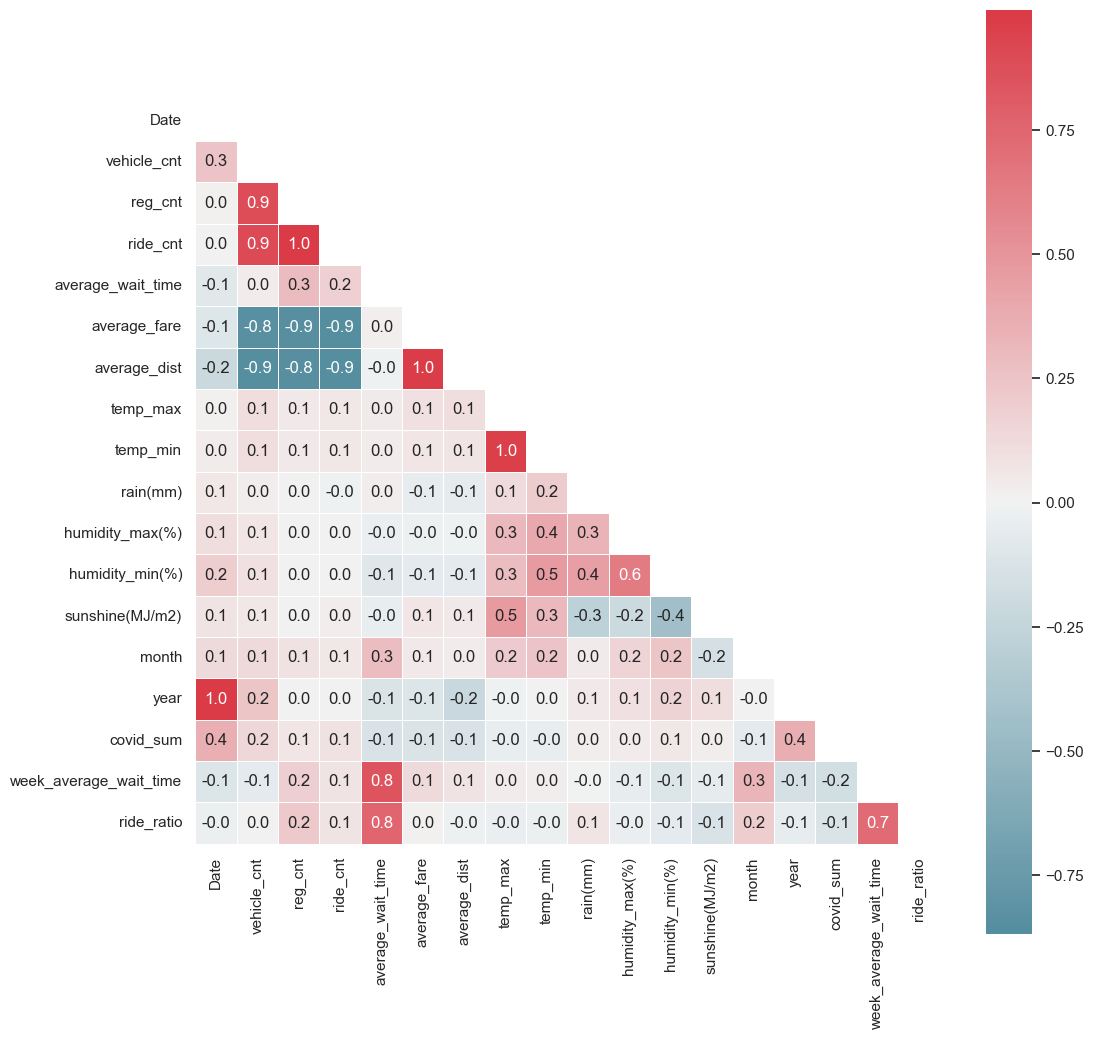

In [15]:
num_vars = ['Date', 'vehicle_cnt', 'reg_cnt', 'ride_cnt', 'average_wait_time',
       'average_fare', 'average_dist', 'temp_max', 'temp_min', 'rain(mm)',
       'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)',
       'month', 'year', 'covid_sum',
       'week_average_wait_time', 'ride_ratio']

eda_2_corr(df, num_vars)

#### 산점도 (수치형)

In [16]:
def eda_2_nn(data, target, var, hue = ''):

    plt.figure(figsize = (8,8))
    
    if hue == '' :
        sns.scatterplot(x = var, y = target, data = data)
        plt.grid()

    if hue != '' :
        sns.scatterplot(x = var, y = target, data = data, hue = hue)
        plt.grid()

    plt.show()

##### 차량 운행 -> 평균 대기 시간

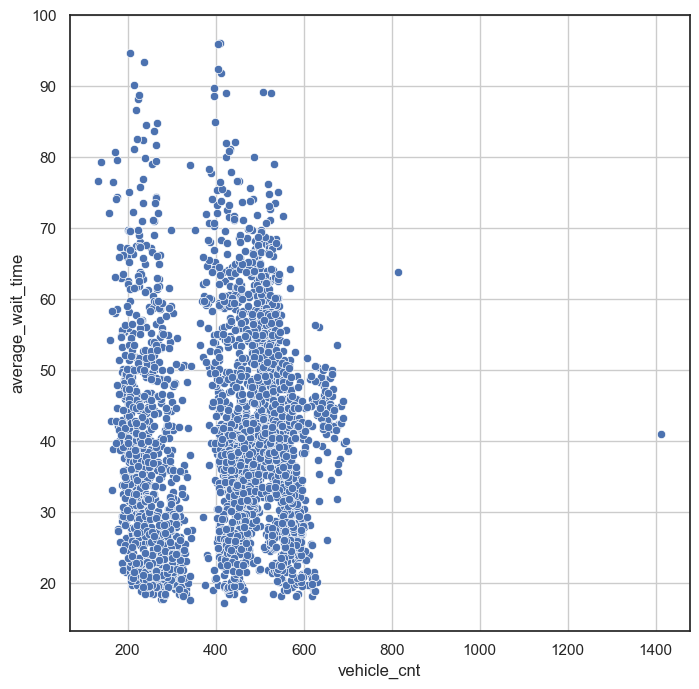

In [17]:
eda_2_nn(df, 'average_wait_time', 'vehicle_cnt')

##### 접수건 -> 평균 대기 시간

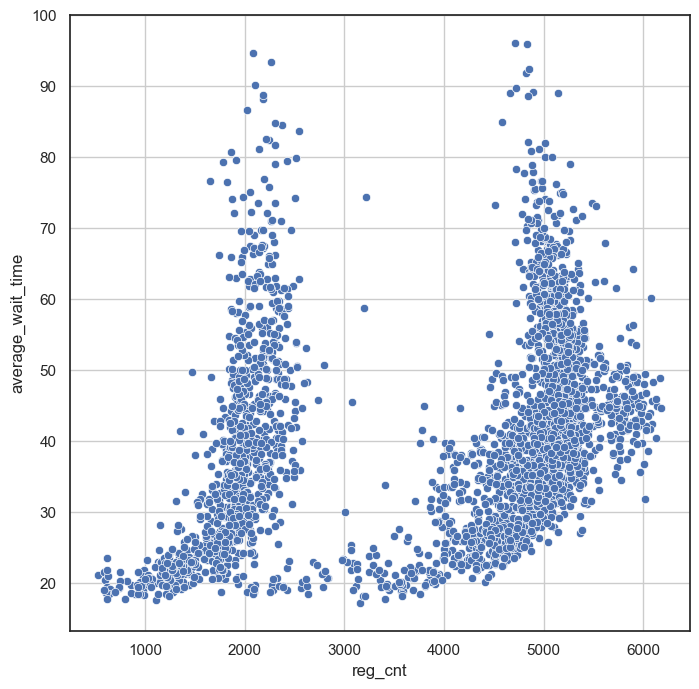

In [18]:
eda_2_nn(df, 'average_wait_time', 'reg_cnt')

##### 탑승건 -> 평균 대기 시간

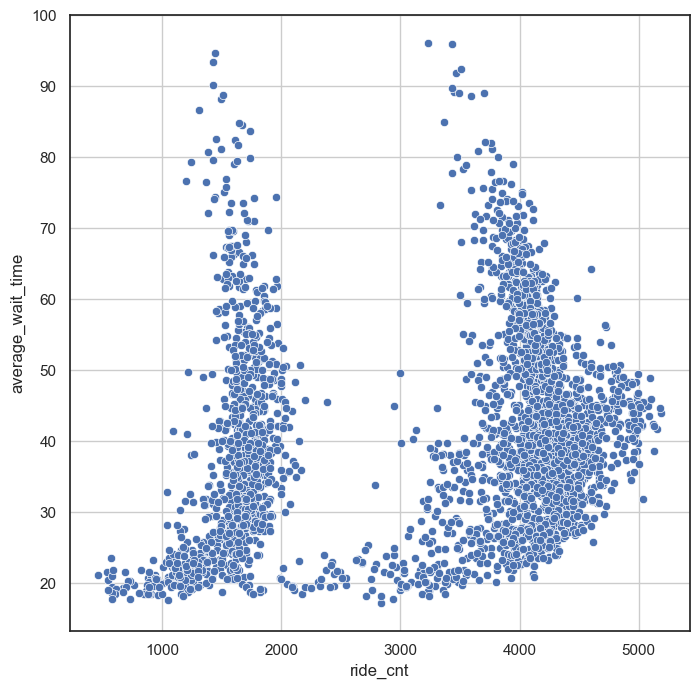

In [19]:
eda_2_nn(df, 'average_wait_time', 'ride_cnt')

##### 탑승율 -> 평균 대기 시간

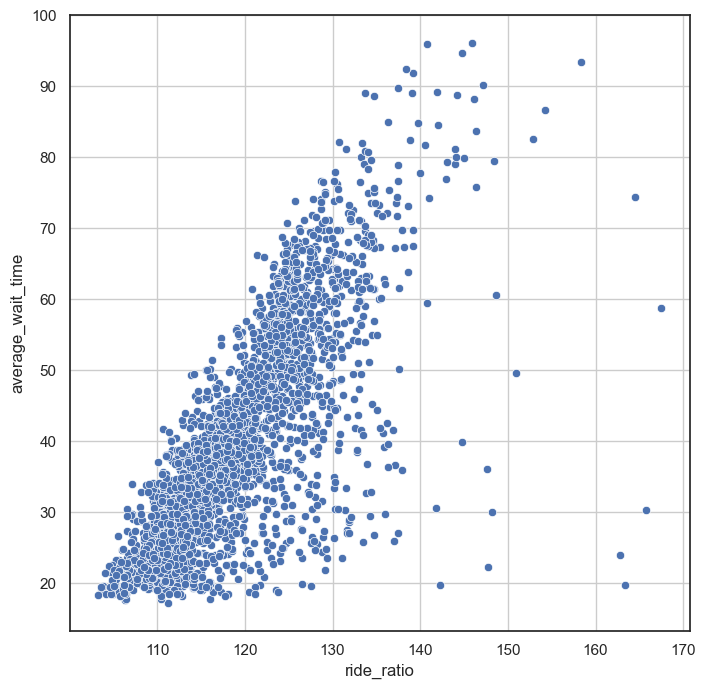

In [20]:
eda_2_nn(df, 'average_wait_time', 'ride_ratio')

In [21]:
df.columns

Index(['Date', 'vehicle_cnt', 'reg_cnt', 'ride_cnt', 'average_wait_time',
       'average_fare', 'average_dist', 'temp_max', 'temp_min', 'rain(mm)',
       'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)', 'month',
       'year', 'weekday', 'season', 'week', 'holiday', 'covid_sum',
       'week_average_wait_time', 'ride_ratio', 'rain'],
      dtype='object')

##### 강수량 -> 평균 대기 시간

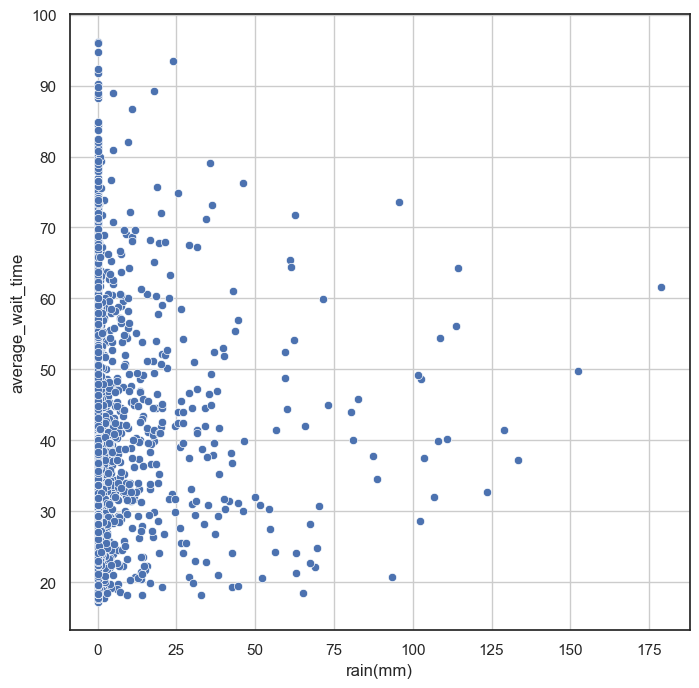

In [22]:
eda_2_nn(df, 'average_wait_time', 'rain(mm)')

##### 코로나 수 -> 평균 대기 시간

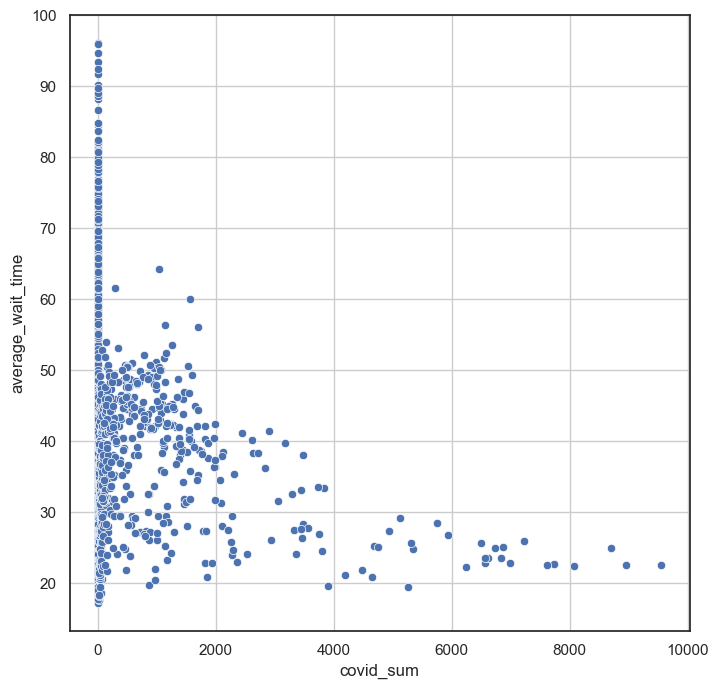

In [23]:
eda_2_nn(df, 'average_wait_time', 'covid_sum')

#### 막대 그래프 (범주형)

#### 강수 여부 -> 평균 대기 시간

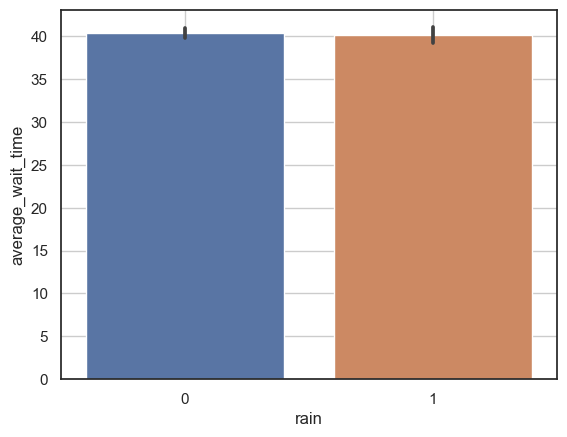

0.398359455017862
0.6903943548383944


In [24]:
# seaborn 막대 그래프
sns.barplot(x ="rain", y ="average_wait_time", data = df)

plt.grid()
plt.show()

# t-test
h0 = df.loc[df['rain']==0, 'average_wait_time']
h1 = df.loc[df['rain']==1, 'average_wait_time']
t_value, p_value = spst.ttest_ind(h0, h1)
print(t_value)
print(p_value)

##### 휴일 -> 평균 대기 시간

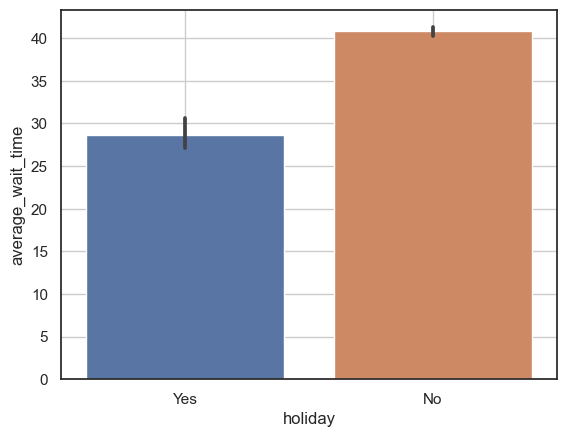

9.34258937743362
1.8079187961897193e-20


In [25]:
# seaborn 막대 그래프
sns.barplot(x ="holiday", y ="average_wait_time", data = df)

plt.grid()
plt.show()

# t-test
h0 = df.loc[df['holiday']=='No', 'average_wait_time']
h1 = df.loc[df['holiday']=='Yes', 'average_wait_time']
t_value, p_value = spst.ttest_ind(h0, h1)
print(t_value)
print(p_value)

##### 요일 -> 평균 대기 시간

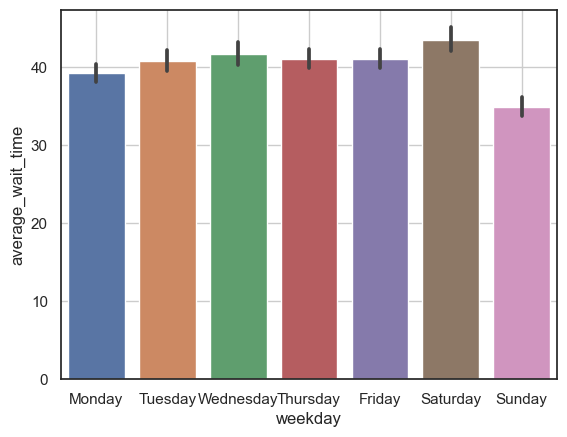

15.66669048966133
8.814291693785567e-18


In [26]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# seaborn 막대 그래프
sns.barplot(x ="weekday", y ="average_wait_time", data = df)

plt.grid()
plt.show()

# anova
temp = df.loc[df['weekday'].notnull()]

w0 = df.loc[temp['weekday']=='Monday', 'average_wait_time']
w1 = df.loc[temp['weekday']=='Tuesday', 'average_wait_time']
w2 = df.loc[temp['weekday']=='Wednesday', 'average_wait_time']
w3 = df.loc[temp['weekday']=='Thursday', 'average_wait_time']
w4 = df.loc[temp['weekday']=='Friday', 'average_wait_time']
w5 = df.loc[temp['weekday']=='Saturday', 'average_wait_time']
w6 = df.loc[temp['weekday']=='Sunday', 'average_wait_time']

f_value, p_value = spst.f_oneway(w0,w1,w2,w3,w4,w5,w6)
print(f_value)
print(p_value)

##### 주말 -> 평균 대기 시간

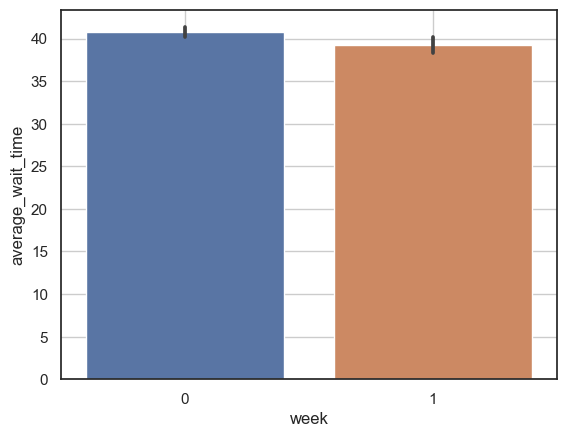

2.678771760563849
0.007430687870107434


In [27]:
# seaborn 막대 그래프
sns.barplot(x ="week", y ="average_wait_time", data = df)

plt.grid()
plt.show()

# t-test
h0 = df.loc[df['week']==0, 'average_wait_time']
h1 = df.loc[df['week']==1, 'average_wait_time']
t_value, p_value = spst.ttest_ind(h0, h1)
print(t_value)
print(p_value)

##### 계절 -> 평균 대기 시간

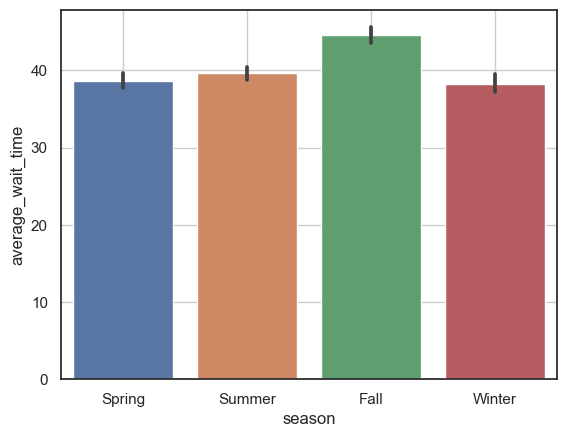

32.43282248735729
1.2875953782618546e-20


In [28]:
sns.barplot(x = 'season', y = 'average_wait_time', data = df)
plt.grid()
plt.show()

# anova
temp = df.loc[df['season'].notnull()]

s0 = temp.loc[temp['season']=='Spring', 'average_wait_time']
s1 = temp.loc[temp['season']=='Summer', 'average_wait_time']
s2 = temp.loc[temp['season']=='Fall', 'average_wait_time']
s3 = temp.loc[temp['season']=='Winter', 'average_wait_time']

f_value, p_value = spst.f_oneway(s0,s1,s2,s3)
print(f_value)
print(p_value)

### (3) 그룹 별 데이터 분석

#### 월별 모든 데이터 분석

In [29]:
temp = df.groupby('month', as_index = False)[['vehicle_cnt', 'reg_cnt', 'ride_cnt', 'average_wait_time','average_fare', 'average_dist', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)', 'covid_sum','week_average_wait_time', 'ride_ratio']].sum()
display(temp)

,month,vehicle_cnt,reg_cnt,ride_cnt,average_wait_time,average_fare,average_dist,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),covid_sum,week_average_wait_time,ride_ratio
0,1,94063,913093,766881,8281.7,565345,2243944,646.0,-1337.9,119.4,17809.0,8761.0,2032.95,6597.0,8486.788707,29403.985808
1,2,84408,809554,685249,7778.8,519037,2083955,1194.7,-795.0,198.9,16500.0,7450.0,2549.01,49534.0,7753.571429,26643.264592
2,3,98892,915450,785868,8725.2,568317,2264138,3165.1,709.1,363.8,18595.0,7727.0,3617.94,186120.0,8759.142857,28845.714247
3,4,99885,951475,806054,9510.9,554571,2235230,4496.8,2059.7,560.2,18390.0,7629.0,4245.58,64421.0,9382.828571,28261.321264
4,5,102562,969822,813052,10213.0,576900,2346687,5989.2,3430.2,767.5,19535.0,9138.0,5005.41,14289.0,10195.700000,29579.620172
5,6,103422,960313,809481,9691.6,554158,2230236,6753.1,4602.5,1104.3,19890.0,10732.0,4463.09,6037.0,9687.214286,28411.419239
6,7,108360,1016710,852590,9928.3,568021,2269586,7500.4,5818.8,2274.0,21551.0,14083.0,3746.49,33894.0,10030.085714,29443.396333
7,8,107756,995711,830927,9565.1,566975,2263514,7568.0,5887.9,2279.6,21556.0,13684.8,3492.64,58286.0,9446.542857,29605.317553
8,9,107139,951002,789108,10167.4,559580,2278324,6434.8,4401.7,820.5,19527.0,11048.0,3555.03,26765.0,10172.171429,28820.181176
9,10,107629,995588,823931,11055.3,581591,2364170,5071.0,2709.4,539.9,20163.0,10315.0,2926.34,17023.0,10906.142857,30034.911679


#### 연도별 코로나 데이터 분석

In [30]:
temp = df.groupby('year', as_index = False)[['covid_sum']].sum()
display(temp)

,year,covid_sum
0,2015,0.0
1,2016,0.0
2,2017,0.0
3,2018,0.0
4,2019,0.0
5,2020,2072.0
6,2021,20003.0
7,2022,515991.0


### (4) Target과 관련없는 Feature 제거
- 수치형 변수 : 낮은 상관 계수 Feature 제거
- 범주형 변수 : annova 분석 및 Ttest를 활용

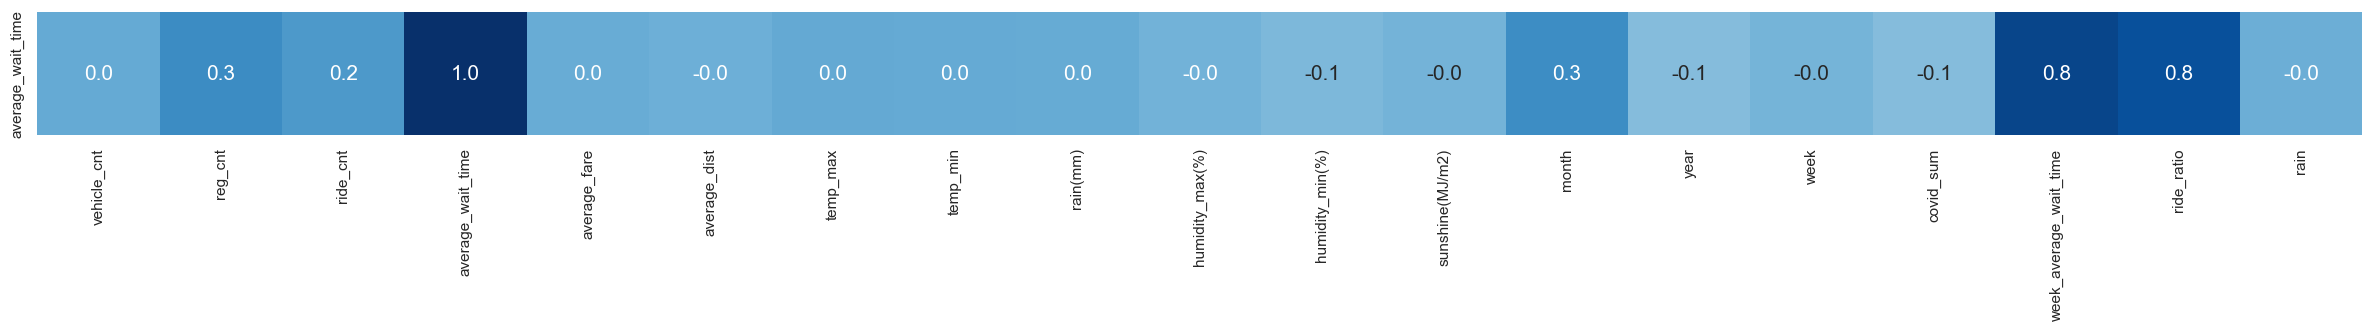

In [31]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize = (30, 15))
sns.heatmap(df.corr(numeric_only=True)[['average_wait_time']].T, 
            annot = True,            # 숫자(상관계수) 표기 여부
            annot_kws={'size': 15},  # 주석(annot)의 스타일 조정
            fmt = '.1f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'Blues',          # 칼라맵
            cbar = False,            # 막대 그래프
            vmin = -1, vmax = 1,     # 값의 최소, 최대값
            square = True)           # 사각형 여부
plt.show()

In [32]:
df = df.drop(['vehicle_cnt', 'reg_cnt', 'ride_cnt',
       'average_fare', 'average_dist', 'temp_max', 'temp_min', 'rain(mm)',
       'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)', 'month',
       'year', 'covid_sum', 'rain'], axis = 1)

### (8) 분석 데이터 저장

In [33]:
# 저장
joblib.dump(df, 'Dataset/preprocess_data2.pkl')

['Dataset/preprocess_data2.pkl']